In [1]:
import ast
import csv
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import Draw
from rdkit.Chem import AllChem, DataStructs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
filepath = './merged.sdf'
mols = Chem.SDMolSupplier(filepath)

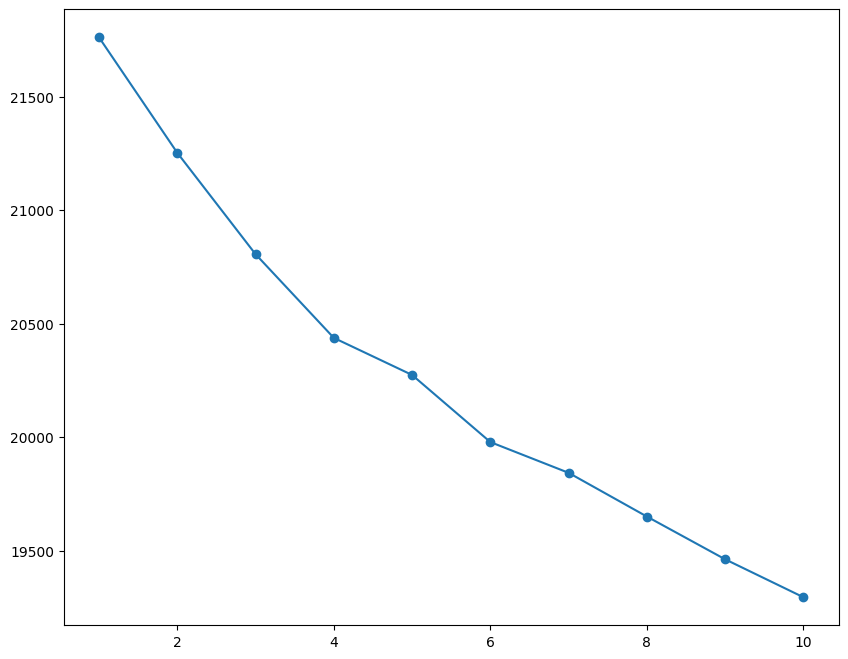

In [3]:
# 初始化环信息
for mol in mols:
    Chem.GetSymmSSSR(mol)  # 这将初始化环信息，避免“RingInfo not initialized”的错误

# 生成分子指纹
fingerprints_mols = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048) for mol in mols]

# 转换指纹为 NumPy 数组，便于计算和聚类
fp_array_mols = np.array([list(fp) for fp in fingerprints_mols])  # 将指纹转换为二进制向量形式

# 使用肘部法则确定最佳聚类数
sse = []
for k in range(1, 11):  # 测试1到10个聚类
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(fp_array_mols)
    sse.append(kmeans.inertia_)  # 聚类内误差平方和

# 绘制肘部图
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), sse, marker='o')
# plt.title('Elbow Method For Optimal k')
# plt.xlabel('Number of clusters')
# plt.ylabel('SSE')
plt.savefig('./cluster/Molecular clustering-k-GNN.png')
plt.show()

In [4]:
# 聚类算法 - 使用 K-means
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(fp_array_mols)  # 训练模型

# 获取聚类结果
labels = kmeans.labels_

# 假设 mol_objects 是与 submol_list 相对应的 Mol 对象列表
mol_objects_mols = mols  # 确保 mol_objects 真实反映了用于生成指纹的分子列表

# 打印每个分子及其对应的聚类标签
for mol, label in zip(mol_objects_mols, labels):
    print(Chem.MolToSmiles(mol), label)

CC1=C(/C=C/C(C)=C/C=C/C(C)=C\C(=O)O)C(C)(C)CCC1 3
Clc1ccc(Cl)c(Cl)c1 3
O=[N+]([O-])c1ccc2ccc3cccc4ccc1c2c34 0
CC(=O)Nc1ccc2c(c1)Cc1ccccc1-2 0
CC(=O)c1cc2ccccc2s1 0
Nc1ccc2ccccc2c1 0
O=[N+]([O-])c1cc2ccc3cccc4ccc(c1)c2c34 0
COc1ccc2c(c1)Oc1cc(O)ccc1[C@@]21OC(=O)c2ccccc21 2
CCOc1ccc2cc(C#N)c(=O)oc2c1 2
COc1ccc2cc(C#N)c(=O)oc2c1 2
CCOc1ccc2c(C(F)(F)F)cc(=O)oc2c1 2
COc1ccc2c(C(F)(F)F)cc(=O)oc2c1 2
COc1ccc2c(c1)CC[C@@H]1[C@@H]2CC[C@@]2(C)[C@H](O)CC[C@@H]12 1
Cc1c[nH]c2ccccc12 0
Nc1ccc(-c2ccccc2)cc1 0
CCOc1ccc2c(CCl)cc(=O)oc2c1 2
COc1ccc([N+](=O)[O-])cc1 2
O=[N+]([O-])c1cc2cccc3ccc4cccc1c4c32 0
Cc1cc2ccccc2c2ccc3ccccc3c12 0
Nc1cc2c3ccccc3ccc2c2ccccc12 0
O=[N+]([O-])c1cc2c3ccccc3ccc2c2ccccc12 0
Cc1cc2c3ccccc3ccc2c2ccccc12 0
CCCCOc1ccc2c(C(F)(F)F)cc(=O)oc2c1 2
c1ccc(COc2ccc3cccnc3c2)cc1 0
O=c1ccc2nc3ccc(OCc4ccccc4)cc3oc-2c1 2
CCOc1ccc2ccc(=O)oc2c1 2
CCOc1ccc2nc3ccc(=O)cc-3oc2c1 2
CCCCCc1cc(O)c2c(c1)OC(C)(C)[C@@H]1[C@@H](O)C=C(C)C[C@@H]21 3
COc1ccc2ccc(=O)oc2c1 2
COc1ccc2nc3ccc(=O)cc-3oc2c1 2
C

680 680


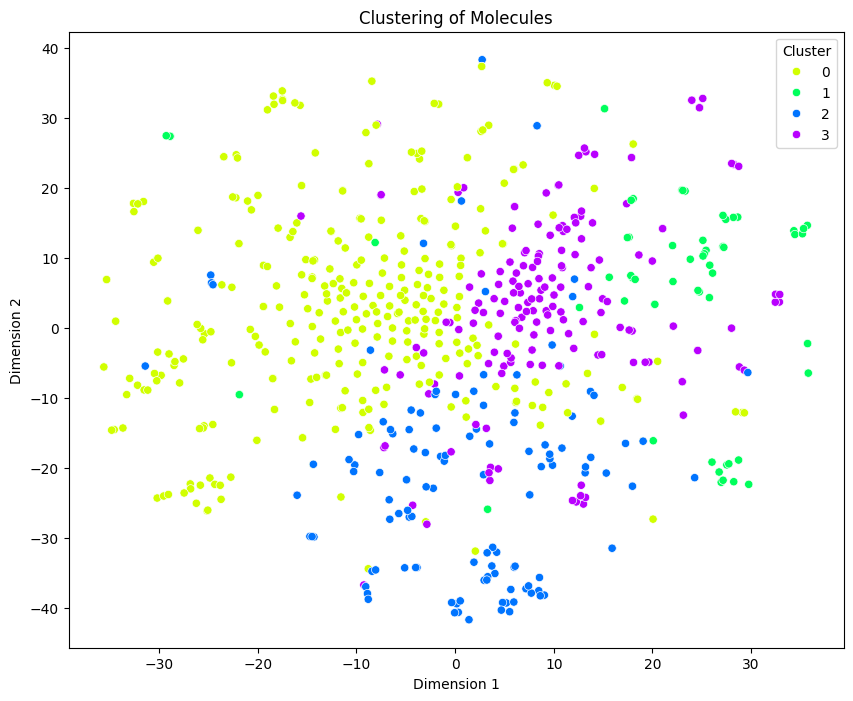

In [5]:
from sklearn.manifold import TSNE
import seaborn as sns

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=42)
fp_tsne = tsne.fit_transform(fp_array_mols)
print(fp_tsne.shape[0], len(labels))
# 可视化
plt.figure(figsize=(10, 8))
sns.scatterplot(x=fp_tsne[:, 0], y=fp_tsne[:, 1], hue=labels, palette=sns.color_palette("hsv", n_colors=4), legend='full')
plt.title('Clustering of Molecules')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Cluster')
plt.savefig('./cluster/Molecular clustering.png')
plt.show()

In [6]:
# 获取聚类中心点
cluster_centers = kmeans.cluster_centers_

# 如果你想查看这些中心点
print("Cluster centers:")
for index, center in enumerate(cluster_centers):
    print(f"Center of Cluster {index}:", center)

Cluster centers:
Center of Cluster 0: [4.33680869e-18 2.38390093e-01 2.78637771e-02 ... 3.09597523e-03
 9.28792570e-03 1.23839009e-02]
Center of Cluster 1: [ 4.83870968e-02  2.90322581e-01  1.61290323e-02 ...  3.22580645e-02
  4.83870968e-02 -3.46944695e-18]
Center of Cluster 2: [-2.60208521e-18  2.19512195e-01  4.06504065e-02 ... -1.73472348e-18
 -5.20417043e-18 -1.73472348e-18]
Center of Cluster 3: [-2.60208521e-18  3.37209302e-01  2.32558140e-02 ...  5.81395349e-03
 -5.20417043e-18  2.60208521e-18]


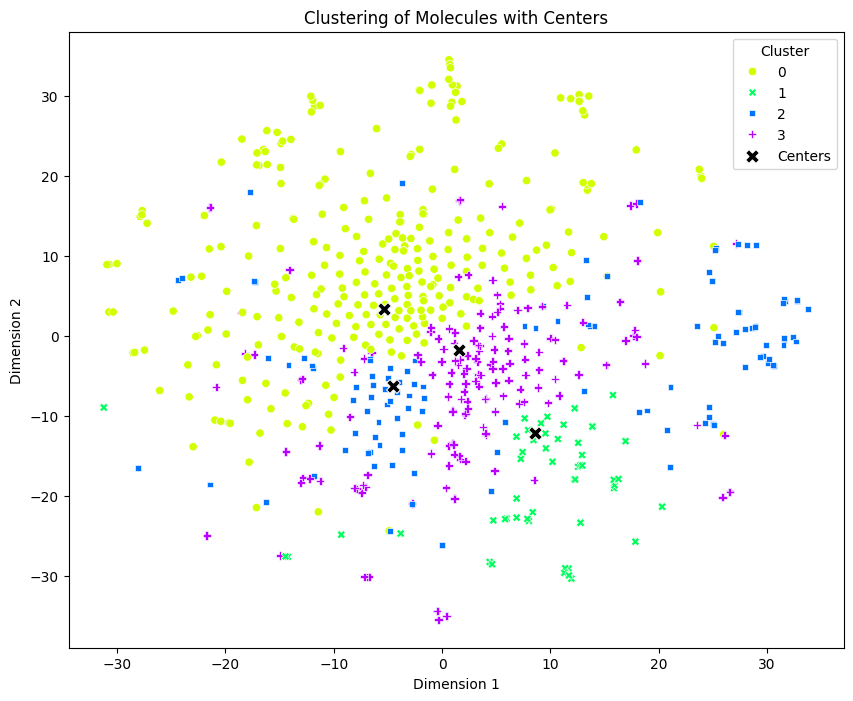

In [12]:
# 先将中心点也用t-SNE降维到二维空间，为了保证降维后的空间一致性，我们需要在包含原始数据点的基础上添加中心点后重新降维
fp_array_with_centers = np.vstack([fp_array_mols, cluster_centers])
tsne = TSNE(n_components=2, random_state=42)
fp_tsne_with_centers = tsne.fit_transform(fp_array_with_centers)

# 分离原始点和中心点
original_points = fp_tsne_with_centers[:-len(cluster_centers), :]
center_points = fp_tsne_with_centers[-len(cluster_centers):, :]

# 绘制散点图
plt.figure(figsize=(10, 8))
sns.scatterplot(x=original_points[:, 0], y=original_points[:, 1], hue=labels, palette=sns.color_palette("hsv", n_colors=4), legend='full', style=labels)
sns.scatterplot(x=center_points[:, 0], y=center_points[:, 1], s=100, color='black', marker='X', label='Centers')
plt.title('Clustering of Molecules with Centers')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Cluster')
# plt.savefig('./cluster/Molecular clustering Central site.png')
plt.show()

In [7]:
from scipy.spatial import distance
closest_indices = []

for i in range(kmeans.n_clusters):
    center = kmeans.cluster_centers_[i]
    # 计算所有分子到该中心的距离
    dists = np.array([distance.euclidean(fp, center) for fp in fp_array_mols])
    # 获取距离最近的三个分子的索引
    closest_idxs = dists.argsort()[:3]
    closest_indices.append(closest_idxs)
    print(closest_indices)

[array([621, 523, 531])]
[array([621, 523, 531]), array([142, 523, 533])]
[array([621, 523, 531]), array([142, 523, 533]), array([ 28, 533, 523])]
[array([621, 523, 531]), array([142, 523, 533]), array([ 28, 533, 523]), array([523, 142, 524])]


In [17]:
closest_indices

[array([621, 523, 531]),
 array([142, 523, 533]),
 array([ 28, 533, 523]),
 array([523, 142, 524])]

[621, 142, 28, 523]


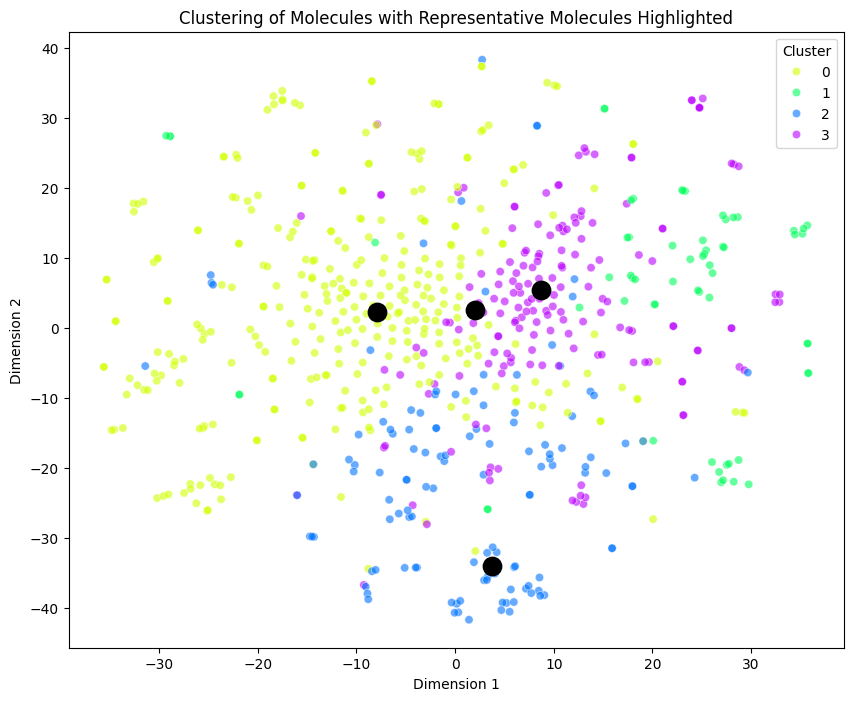

In [68]:
from scipy.spatial import distance
from rdkit.Chem import Draw

# 计算每个聚类中心距离最近的分子
closest_indices = []
for i in range(kmeans.n_clusters):
    center = kmeans.cluster_centers_[i]
    min_dist = np.inf
    closest_index = None
    for idx, fp in enumerate(fp_array_mols):
        dist = distance.euclidean(fp, center)
        if dist < min_dist:
            min_dist = dist
            closest_index = idx
    closest_indices.append(closest_index)
print(closest_indices)
# 绘制所有分子的t-SNE结果
plt.figure(figsize=(10, 8))
sns.scatterplot(x=fp_tsne[:, 0], y=fp_tsne[:, 1], hue=labels, palette=sns.color_palette("hsv", n_colors=kmeans.n_clusters), legend='full', alpha=0.6)

# 标注最具代表性的分子
for idx in closest_indices:
    plt.scatter(fp_tsne[idx, 0], fp_tsne[idx, 1], color='black', s=150, linewidth=2)

plt.title('Clustering of Molecules with Representative Molecules Highlighted')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Cluster')
plt.savefig('./cluster/Molecular clustering Classical molecules.png')
plt.show()

In [34]:
mols[621].GetProp('_Name')

'naphthalene'

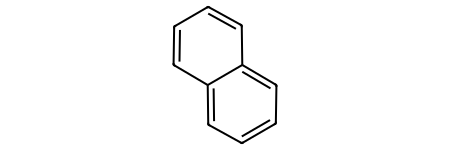

In [38]:
mols[621]

In [35]:
mols[142].GetProp('_Name')

'ethanol'

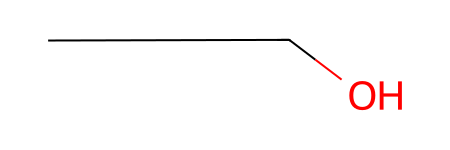

In [39]:
mols[142]

In [36]:
mols[28].GetProp('_Name')

'7-methoxycoumarin'

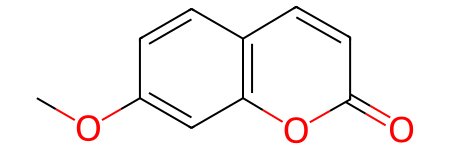

In [40]:
mols[28]

In [37]:
mols[523].GetProp('_Name')

'benzene'

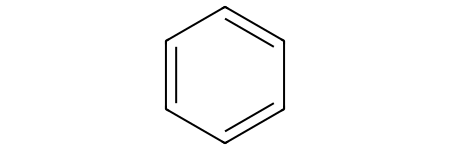

In [41]:
mols[523]